In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline

In [ ]:
## Chargement des données de modélisation

In [2]:
df = pd.read_csv("../../data/processed/lieu-compteur-classes-one-hot-encoded.csv", index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204344 entries, 57773 to 1039253
Data columns (total 76 columns):
 #   Column                                                                 Non-Null Count    Dtype 
---  ------                                                                 --------------    ----- 
 0   Jour                                                                   1204344 non-null  int64 
 1   Mois                                                                   1204344 non-null  int64 
 2   Année                                                                  1204344 non-null  int64 
 3   Heure                                                                  1204344 non-null  int64 
 4   Jour_semaine                                                           1204344 non-null  int64 
 5   Jour férié                                                             1204344 non-null  int64 
 6   Vacances scolaires                                                     1204

In [ ]:
## Renommage des classes et processing variables catégorielles

In [3]:
y = df["Comptage horaire"].replace({
    "0-3": "[00] 0-3",
    "4-9": "[01] 4-9",
    "10-18": "[02] 10-18",
    "19-31": "[03] 19-31",
    "32-46": "[04] 32-46",
    "47-64": "[05] 47-64",
    "65-86": "[06] 65-86",
    "87-115": "[07] 87-115",
    "116-155": "[08] 116-155",
    "156-230": "[09] 156-230",
    "231-450": "[10] 231-450",
    "451+": "[11] 451+",
})
X = df.drop(columns=["Comptage horaire"])

col_norm = ["Jour", "Mois", "Année", "Heure", "Jour_semaine", "Jour férié", "Vacances scolaires"]
encoder = preprocessing.OneHotEncoder(sparse_output=False, dtype=int) 

array = encoder.fit_transform(X[col_norm])

encoded_df_clean = pd.DataFrame(array, columns=encoder.get_feature_names_out(col_norm))

encoded_df_clean.index = X.index

X_clean = pd.concat([X.drop(columns=col_norm), encoded_df_clean], axis=1)

In [4]:
X_clean.head()

,Nom du site de comptage_10 avenue de la Grande Armée,Nom du site de comptage_10 boulevard Auguste Blanqui,Nom du site de comptage_102 boulevard de Magenta,Nom du site de comptage_106 avenue Denfert Rochereau,Nom du site de comptage_129 rue Lecourbe,Nom du site de comptage_132 rue Lecourbe,Nom du site de comptage_135 avenue Daumesnil,Nom du site de comptage_147 avenue d'Italie,Nom du site de comptage_152 boulevard du Montparnasse,Nom du site de comptage_16 avenue de la Porte des Ternes,...,Jour_semaine_2,Jour_semaine_3,Jour_semaine_4,Jour_semaine_5,Jour_semaine_6,Jour_semaine_7,Jour férié_0,Jour férié_1,Vacances scolaires_0,Vacances scolaires_1
57773,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1092998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1171485,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
57487,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
57812,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
## Encodage variable cible

In [5]:
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

In [6]:
y

array([11, 11, 11, ...,  0,  0,  0])

In [ ]:
## Séparation datasets d'entrainement et de test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

In [ ]:
## Entrainement du modèle avec valeurs optimales

In [10]:
clf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=70, min_samples_split=15, min_samples_leaf=2, max_features='sqrt', n_jobs=-1)
clf.fit(X_train, y_train)
print("train score", clf.score(X_train, y_train))
print("test score", clf.score(X_test, y_test))

train score 0.676591504709515
test score 0.5452424346844135


In [12]:
y_pred = clf.predict(X_test)

In [13]:
y_test = label_enc.inverse_transform(y_test)
y_pred = label_enc.inverse_transform(y_pred)

In [ ]:
## Matrice de confusion

In [21]:
matrice_confusion = pd.crosstab(y_test, y_pred, rownames=['Classes réelles'], colnames=['Classes prédites'])
matrice_confusion_n = pd.crosstab(y_test, y_pred, rownames=['Classes réelles'], colnames=['Classes prédites'], normalize=True)
matrice_confusion

Classes prédites,[00] 0-3,[01] 4-9,[02] 10-18,[03] 19-31,[04] 32-46,[05] 47-64,[06] 65-86,[07] 87-115,[08] 116-155,[09] 156-230,[10] 231-450,[11] 451+
Classes réelles,,,,,,,,,,,,
[00] 0-3,15575,4078,586,303,139,174,137,169,117,137,255,95
[01] 4-9,3522,11804,4315,650,91,49,32,36,15,27,46,19
[02] 10-18,249,4319,10113,4629,654,228,79,41,22,23,34,7
[03] 19-31,72,330,4008,10806,4053,1194,375,157,59,33,49,8
[04] 32-46,39,46,373,4776,8260,4872,1314,478,183,64,42,9
[05] 47-64,50,11,79,834,4152,8976,4816,1508,455,208,56,15
[06] 65-86,52,11,36,196,771,4424,8373,4993,1287,507,120,13
[07] 87-115,38,6,11,82,163,842,4171,9855,4435,1294,296,37
[08] 116-155,33,1,4,16,41,135,663,4529,9828,4377,778,42


In [22]:
matrice_confusion_n = matrice_confusion_n * 100
matrice_confusion_n = matrice_confusion_n.round(2)


In [25]:
for i, _ in enumerate(matrice_confusion_n):
    for j, _ in enumerate(matrice_confusion_n.iloc[i]):
        matrice_confusion_n.iloc[i, j] = str(matrice_confusion_n.iloc[i, j]) + ' %'
matrice_confusion_n

/var/folders/zf/_lqw56895pn79xjzxj5wc0vc0000gn/T/ipykernel_80293/150181180.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.47 %' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  matrice_confusion_n.iloc[i, j] = str(matrice_confusion_n.iloc[i, j]) + ' %'
/var/folders/zf/_lqw56895pn79xjzxj5wc0vc0000gn/T/ipykernel_80293/150181180.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.69 %' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  matrice_confusion_n.iloc[i, j] = str(matrice_confusion_n.iloc[i, j]) + ' %'
/var/folders/zf/_lqw56895pn79xjzxj5wc0vc0000gn/T/ipykernel_80293/150181180.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.24 %' has dtype in

Classes prédites,[00] 0-3,[01] 4-9,[02] 10-18,[03] 19-31,[04] 32-46,[05] 47-64,[06] 65-86,[07] 87-115,[08] 116-155,[09] 156-230,[10] 231-450,[11] 451+
Classes réelles,,,,,,,,,,,,
[00] 0-3,6.47 %,1.69 %,0.24 %,0.13 %,0.06 %,0.07 %,0.06 %,0.07 %,0.05 %,0.06 %,0.11 %,0.04 %
[01] 4-9,1.46 %,4.9 %,1.79 %,0.27 %,0.04 %,0.02 %,0.01 %,0.01 %,0.01 %,0.01 %,0.02 %,0.01 %
[02] 10-18,0.1 %,1.79 %,4.2 %,1.92 %,0.27 %,0.09 %,0.03 %,0.02 %,0.01 %,0.01 %,0.01 %,0.0 %
[03] 19-31,0.03 %,0.14 %,1.66 %,4.49 %,1.68 %,0.5 %,0.16 %,0.07 %,0.02 %,0.01 %,0.02 %,0.0 %
[04] 32-46,0.02 %,0.02 %,0.15 %,1.98 %,3.43 %,2.02 %,0.55 %,0.2 %,0.08 %,0.03 %,0.02 %,0.0 %
[05] 47-64,0.02 %,0.0 %,0.03 %,0.35 %,1.72 %,3.73 %,2.0 %,0.63 %,0.19 %,0.09 %,0.02 %,0.01 %
[06] 65-86,0.02 %,0.0 %,0.01 %,0.08 %,0.32 %,1.84 %,3.48 %,2.07 %,0.53 %,0.21 %,0.05 %,0.01 %
[07] 87-115,0.02 %,0.0 %,0.0 %,0.03 %,0.07 %,0.35 %,1.73 %,4.09 %,1.84 %,0.54 %,0.12 %,0.02 %
[08] 116-155,0.01 %,0.0 %,0.0 %,0.01 %,0.02 %,0.06 %,0.28 %,1.88 %,4.08 %,1.82 %,0.32 %,0.02 %


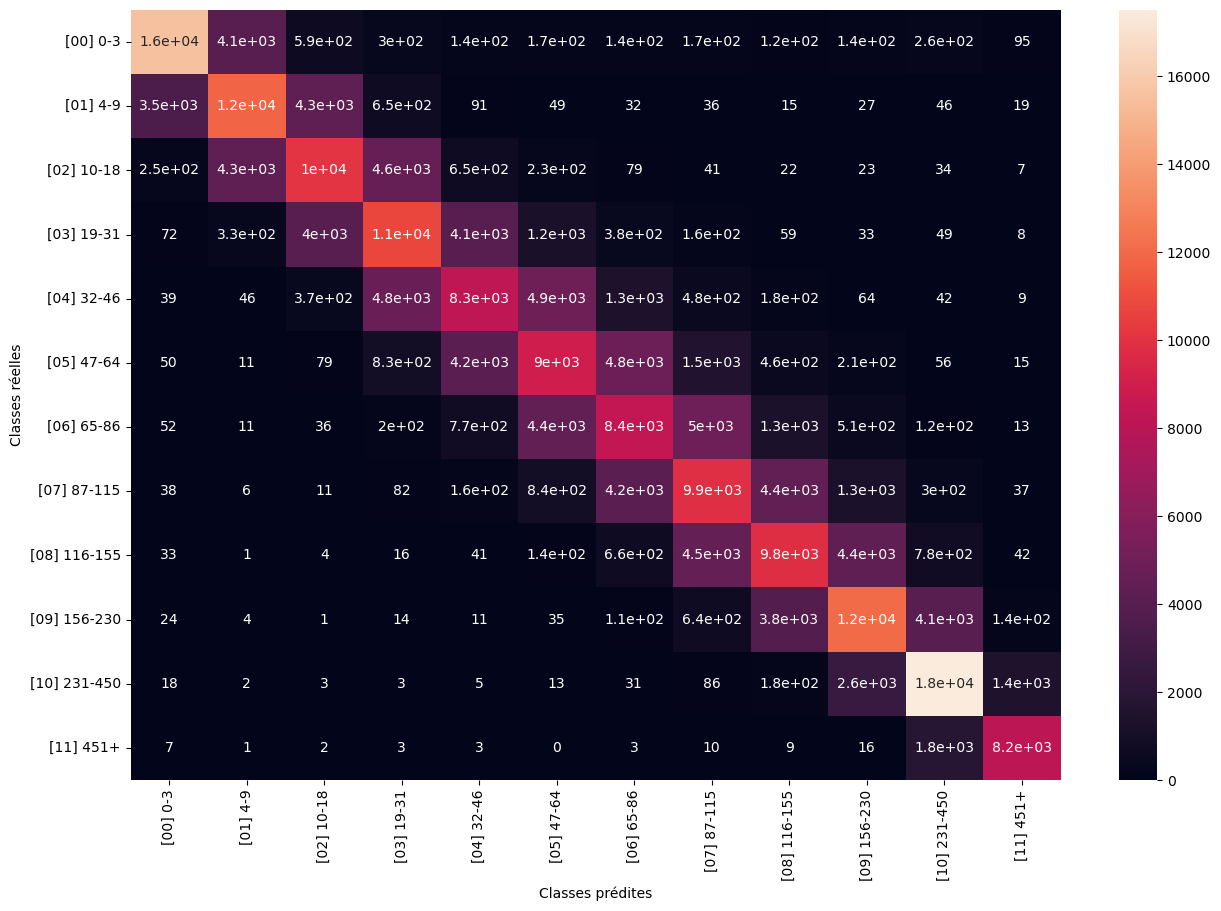

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(matrice_confusion, annot=True, cmap='rocket')
plt.show()

In [ ]:
## Rapport de classification

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    [00] 0-3       0.79      0.72      0.75     21765
    [01] 4-9       0.57      0.57      0.57     20606
  [02] 10-18       0.52      0.50      0.51     20398
  [03] 19-31       0.48      0.51      0.50     21144
  [04] 32-46       0.45      0.40      0.43     20456
  [05] 47-64       0.43      0.42      0.43     21160
  [06] 65-86       0.42      0.40      0.41     20783
 [07] 87-115       0.44      0.46      0.45     21230
[08] 116-155       0.48      0.48      0.48     20447
[09] 156-230       0.56      0.58      0.57     20928
[10] 231-450       0.70      0.80      0.75     21875
   [11] 451+       0.82      0.81      0.82     10077

    accuracy                           0.55    240869
   macro avg       0.56      0.55      0.55    240869
weighted avg       0.54      0.55      0.54    240869

